In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split

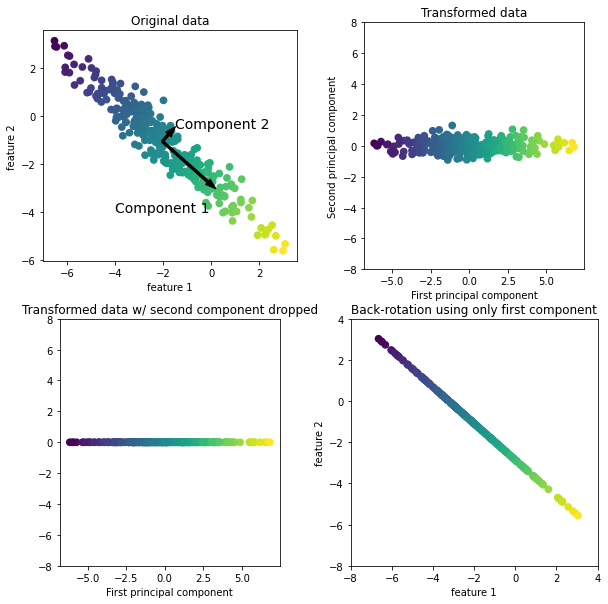

In [3]:
mglearn.plots.plot_pca_illustration()

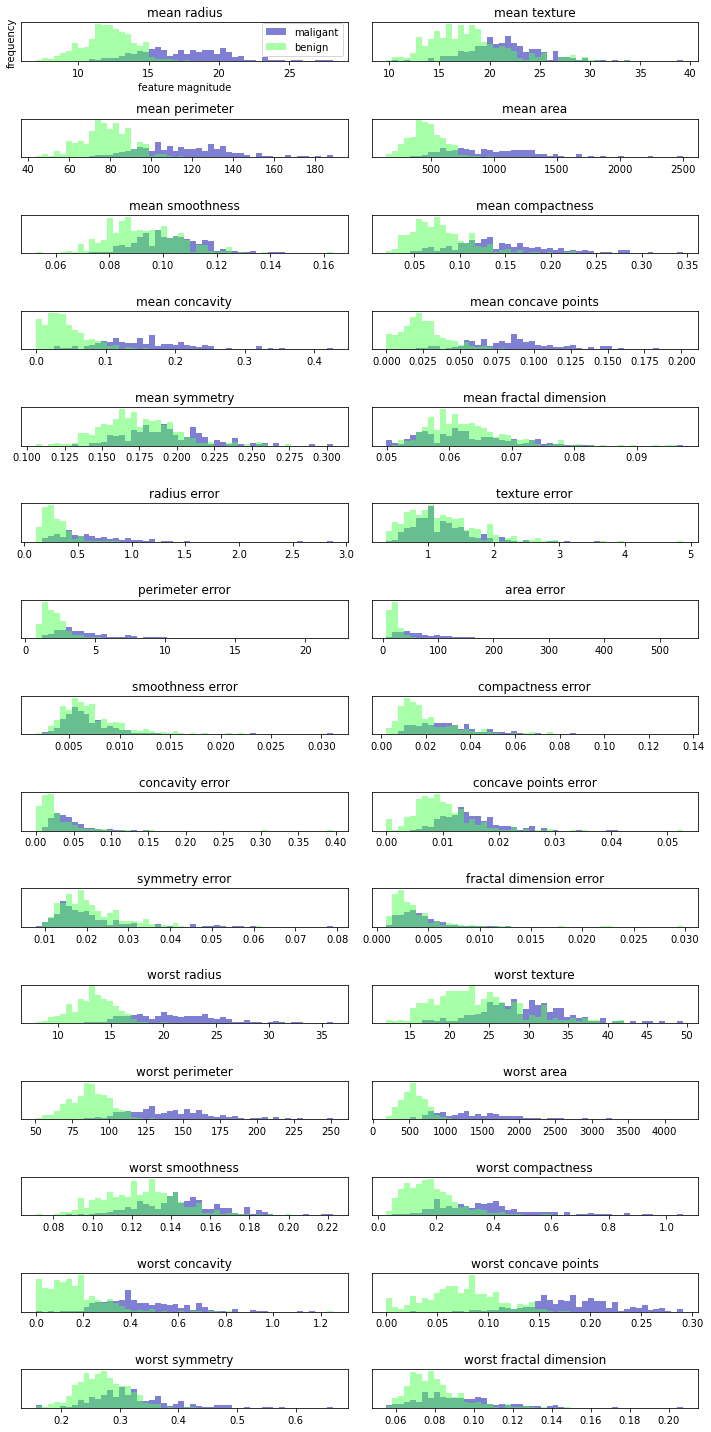

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
maligant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(maligant[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('feature magnitude')
ax[0].set_ylabel('frequency')
ax[0].legend(['maligant', 'benign'], loc='best')
fig.tight_layout()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [10]:
from sklearn.decomposition import PCA
# データの最初の2つの主成分だけを維持する
pca = PCA(n_components=2)
# cancerデータセットにPCAモデルを適合
pca.fit(X_scaled)
# 最初の2つの主成分に対してデータポイントを変換
X_pca = pca.transform(X_scaled)
print(str(X_scaled.shape))
print(str(X_pca.shape))

(569, 30)
(569, 2)


Text(0, 0.5, 'second principal component')

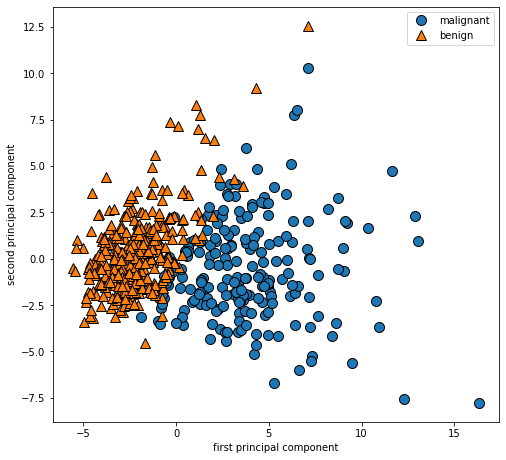

In [11]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('first principal component')
plt.ylabel('second principal component')

In [12]:
print(pca.components_.shape)
print(pca.components_)

(2, 30)
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'principal components')

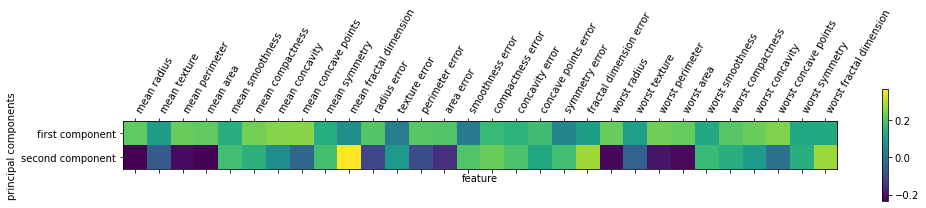

In [13]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['first component', 'second component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel('feature')
plt.ylabel('principal components')

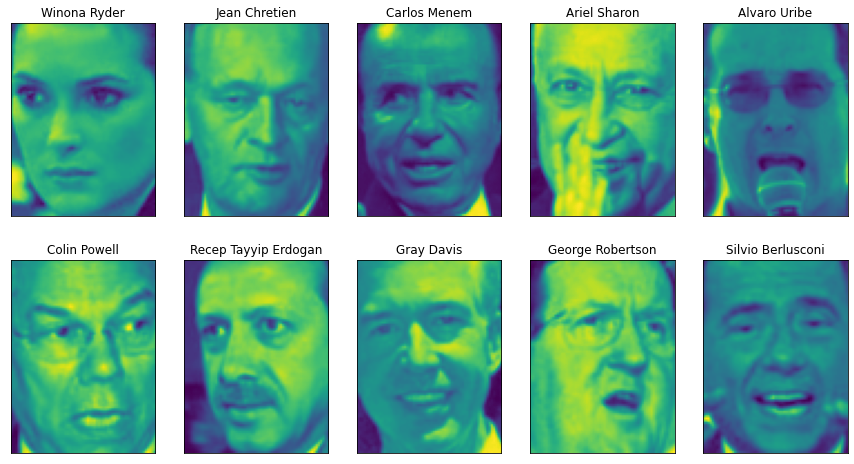

In [15]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [20]:
print(people.images.shape)
print(len(people.target_names))
print(people.target)
print(people.target_names[10])

(3023, 87, 65)
62
[61 25  9 ... 14 15 14]
Colin Powell


In [21]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print(name, count)
    if(i+1)%3 == 0:
        print

Alejandro Toledo 39
Alvaro Uribe 35
Amelie Mauresmo 21
Andre Agassi 36
Angelina Jolie 20
Ariel Sharon 77
Arnold Schwarzenegger 42
Atal Bihari Vajpayee 24
Bill Clinton 29
Carlos Menem 21
Colin Powell 236
David Beckham 31
Donald Rumsfeld 121
George Robertson 22
George W Bush 530
Gerhard Schroeder 109
Gloria Macapagal Arroyo 44
Gray Davis 26
Guillermo Coria 30
Hamid Karzai 22
Hans Blix 39
Hugo Chavez 71
Igor Ivanov 20
Jack Straw 28
Jacques Chirac 52
Jean Chretien 55
Jennifer Aniston 21
Jennifer Capriati 42
Jennifer Lopez 21
Jeremy Greenstock 24
Jiang Zemin 20
John Ashcroft 53
John Negroponte 31
Jose Maria Aznar 23
Juan Carlos Ferrero 28
Junichiro Koizumi 60
Kofi Annan 32
Laura Bush 41
Lindsay Davenport 22
Lleyton Hewitt 41
Luiz Inacio Lula da Silva 48
Mahmoud Abbas 29
Megawati Sukarnoputri 33
Michael Bloomberg 20
Naomi Watts 22
Nestor Kirchner 37
Paul Bremer 20
Pete Sampras 22
Recep Tayyip Erdogan 30
Ricardo Lagos 27
Roh Moo-hyun 32
Rudolph Giuliani 26
Saddam Hussein 23
Serena Williams 52

In [29]:
mask = np.zeros(people.target.shape, dtype=bool)
print(mask)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
print(X_people)
y_people = people.target[mask]
X_people = X_people/255
print(X_people.shape)

[False False False ... False False False]
[[ 57.         60.333332   78.        ...  17.333334   16.666666
   22.666666 ]
 [ 66.666664   80.666664   88.666664  ...   8.666667    8.333333
    9.333333 ]
 [ 18.666666   14.333333   15.        ...  22.666666   22.666666
   25.666666 ]
 ...
 [ 36.333332   22.333334   28.        ...  14.333333    6.6666665
    5.3333335]
 [ 54.         65.333336   56.333332  ... 209.66667   210.
  212.33333  ]
 [110.666664  128.33333   145.33333   ...  14.         14.
   13.666667 ]]
(2063, 5655)


In [25]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.23255813953488372


In [32]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(1547, 100)


In [33]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print(knn.score(X_test_pca, y_test))

0.312015503875969


In [34]:
print(pca.components_.shape)

(100, 5655)


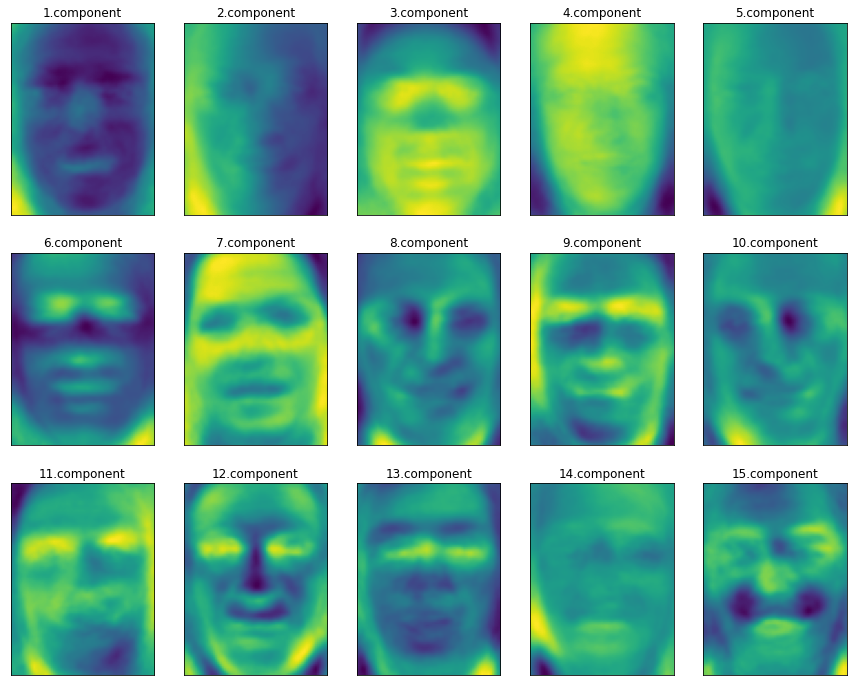

In [37]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title('{}.component'.format((i+1)))

### NMF
非負値行列因子分解（NMF）も有用な特徴量を抽出することを目的とする教師なし学習手法<br>
このアルゴリズムの動作はPCAと似ていて、次元削減に用いることが出来る

C:\ForDevelop\anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\ForDevelop\anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


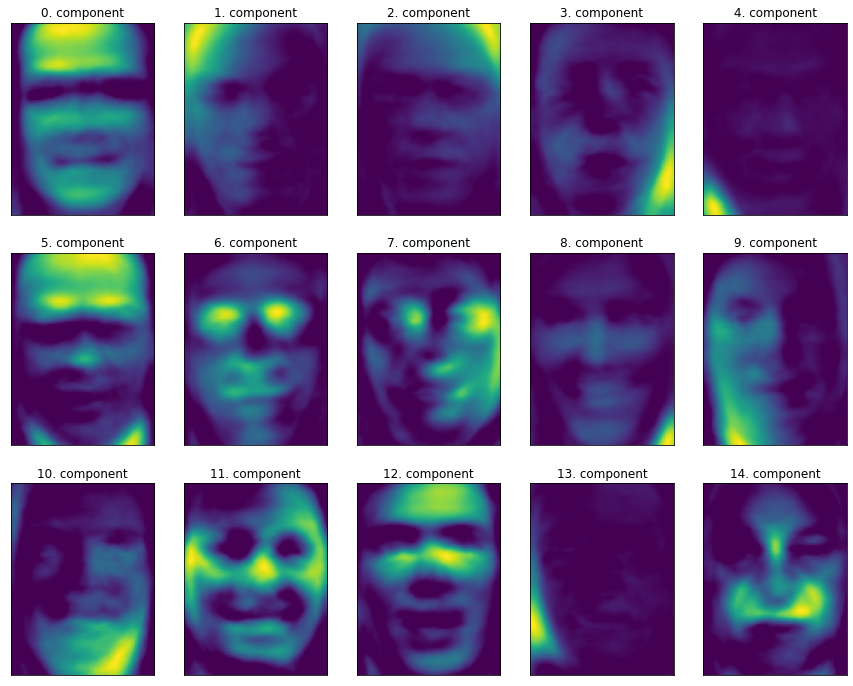

In [40]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('{}. component'.format(i))

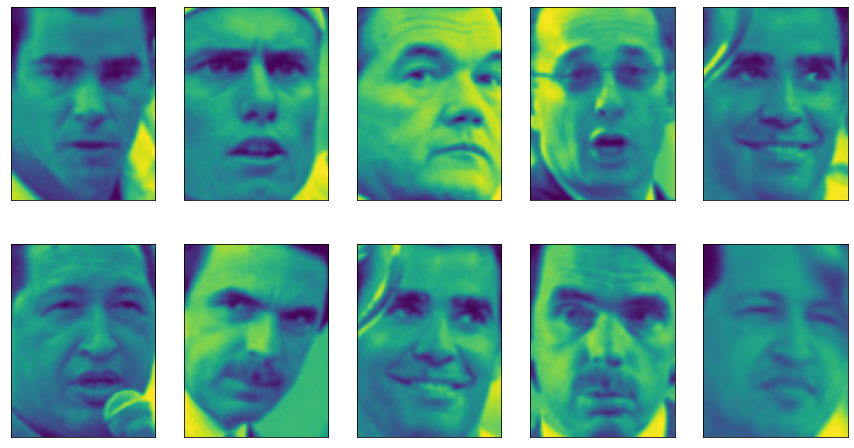

In [41]:
# 成分3は少し右を向いた顔をしていることがわかる
# この成分が特に強い画像を見てみる
compn = 3
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':(), 'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

### 多様体学習アルゴリズム
主に可視化に用いられ、3以上の新しい特徴量を生成するように利用することはない

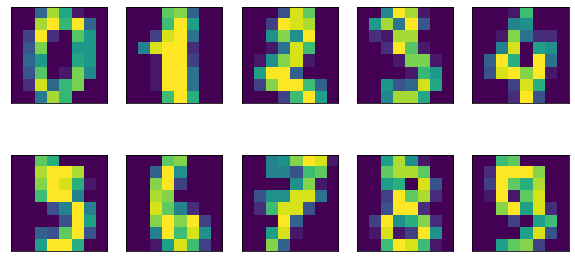

In [43]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

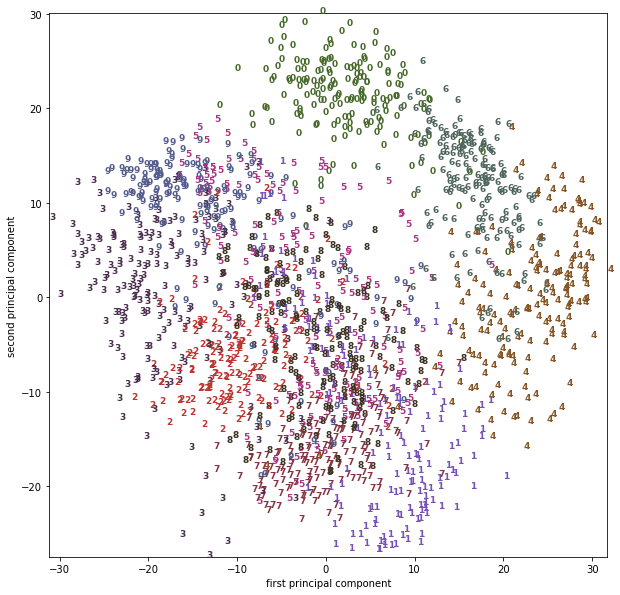

In [46]:
# PCAを使って上記のデータを2次元にして可視化してみる
# 最初の2つの主成分を用い、各店をクラスごとに色分けする
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525', '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color=colors[digits.target[i]], fontdict={'weight':'bold', 'size':9})
    plt.xlabel('first principal component')
    plt.ylabel('second principal component')

In [50]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

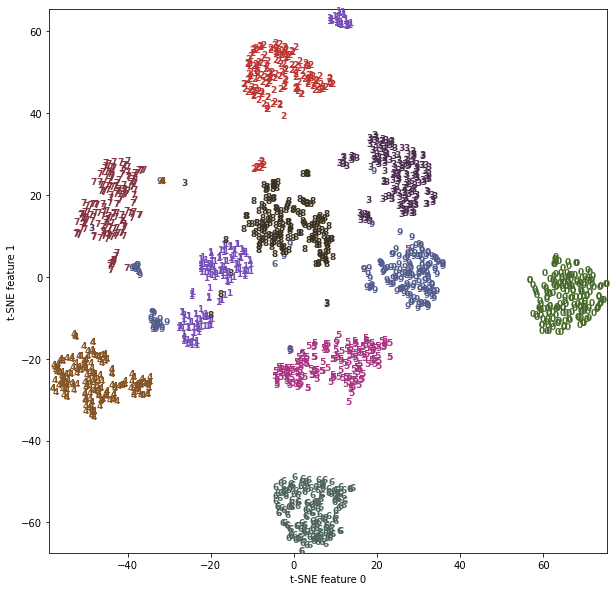

In [51]:
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()+1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color=colors[digits.target[i]], fontdict={'weight':'bold', 'size':9})
    plt.xlabel('t-SNE feature 0')
    plt.ylabel('t-SNE feature 1')